In [20]:
# Dependencies and Setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
import scipy.stats as st

# Read the data
zips_df = pd.read_csv(r"zip_code_data_cleaned.csv")
unemployment_df = pd.read_csv(r"KS_MO_Unemployment_Data_Cleaned.csv")
census_data_df = pd.read_csv(r"census_data.csv")
ppp_data_df = pd.read_csv(r"PPP Data Combined.csv")

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
ppp_data_df.head(1)

,Loan Code,Loan Range,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,a,5-10 million,"AMERICAN IMPLEMENT, INC.",2302 E MARY ST,GARDEN CITY,KS,67846,423820.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,356.0,4/8/2020,The Western State Bank,KS-01


In [22]:
ppp_loan_count_df = ppp_data_df.groupby(ppp_data_df['Loan Code']).count()

In [23]:
ppp_loan_count_df

,Loan Range,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
Loan Code,,,,,,,,,,,,,,,,
a,133,133,133,133,133,133,133,133,133,133,133,12,130,133,133,133
b,743,743,743,743,743,743,742,741,743,743,743,117,712,743,743,743
c,1409,1409,1409,1409,1409,1409,1406,1409,1409,1409,1409,206,1353,1409,1409,1409
d,5343,5343,5343,5343,5343,5343,5334,5343,5343,5343,5343,500,5138,5343,5343,5343
e,9780,9780,9780,9780,9780,9780,9739,9780,9780,9780,9780,703,9394,9780,9780,9780
f,131944,0,0,131944,131944,131944,130416,131931,131944,131944,131944,5363,125768,131944,131944,131944


In [24]:
ppp_loan_count_df['Zip']

Loan Code
a        133
b        743
c       1409
d       5343
e       9780
f     131944
Name: Zip, dtype: int64

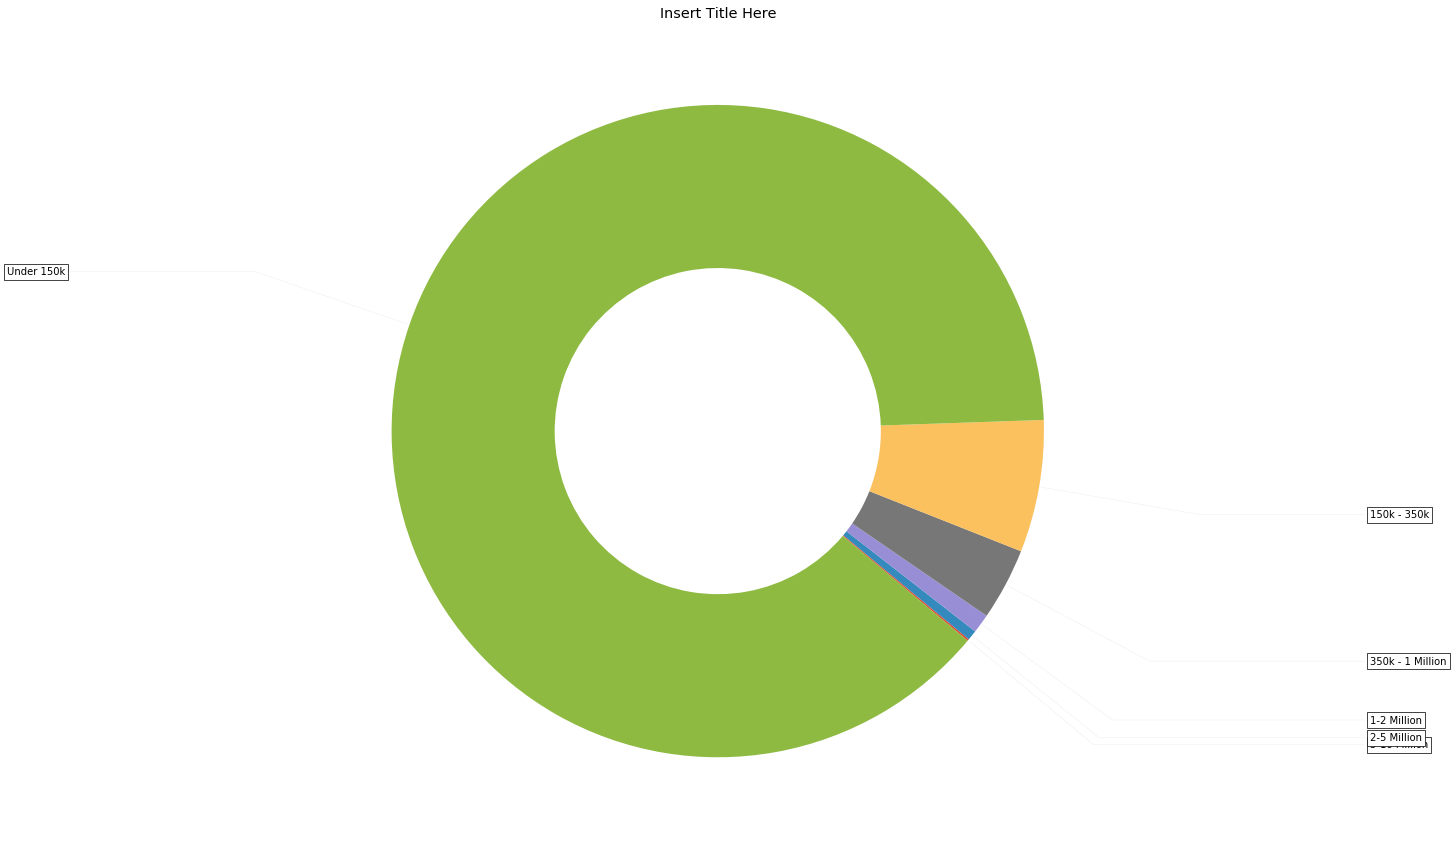

In [25]:
labels = '5-10 Million', '2-5 Million', '1-2 Million', '350k - 1 Million', '150k - 350k', 'Under 150k'
sizes = ppp_loan_count_df['Zip']

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(2*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw)
ax.set_title("Insert Title Here")
plt.show()

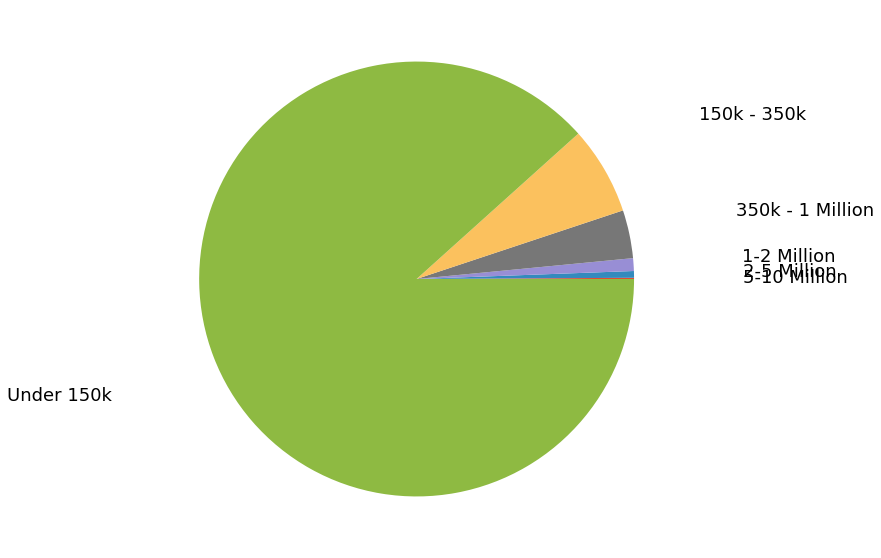

In [26]:
fig = plt.figure(figsize = (10,10))

labels = '5-10 Million', '2-5 Million', '1-2 Million', '350k - 1 Million', '150k - 350k', 'Under 150k'
sizes = ppp_loan_count_df['Zip']
explode = (.5, .5, 0,0,0,0)


plt.pie(sizes, labels = labels, labeldistance = 1.5, textprops = {'fontsize': 18})

centre_circle = plt.Circle((0,0), 0.70, fc= 'white')
fig = plt.gcf()
fig


plt.show()

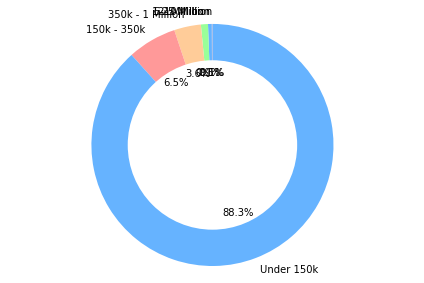

In [27]:
labels = '5-10 Million', '2-5 Million', '1-2 Million', '350k - 1 Million', '150k - 350k', 'Under 150k'
sizes = ppp_loan_count_df['Zip']

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

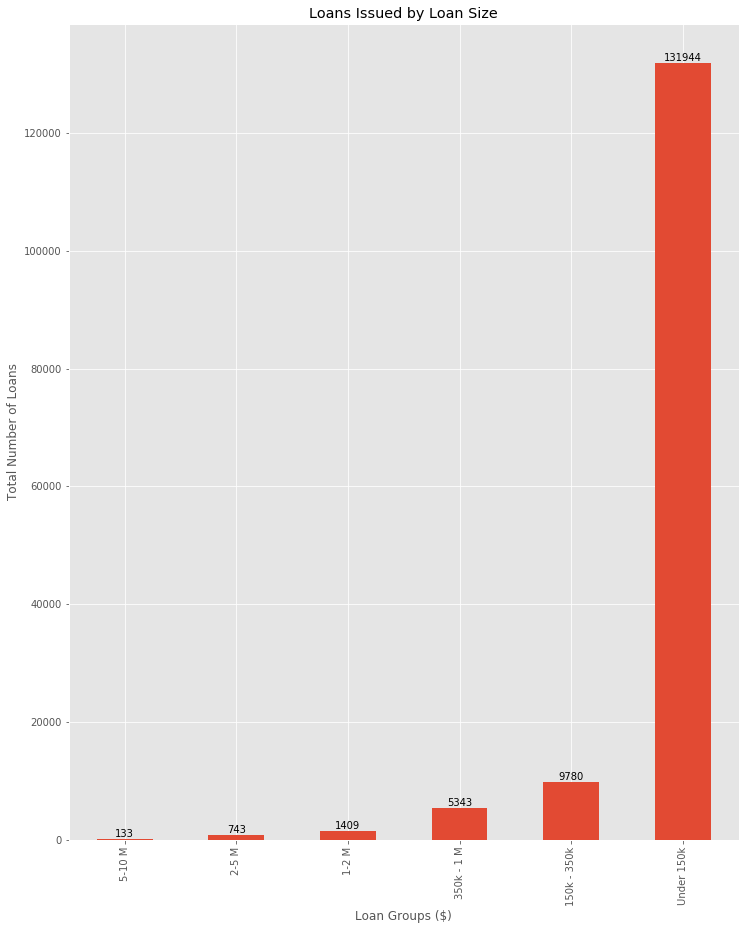

In [47]:
plt.style.use('ggplot')

loan_amount = ppp_loan_count_df['Zip']
x = ['5-10 M', '2-5 M', '1-2 M', '350k - 1 M', '150k - 350k', 'Under 150k']
x_labels = ppp_loan_count_df['Zip']

plt.figure(figsize=(12, 15))
ax = loan_amount.plot(kind='bar')
ax.set_title('Loans Issued by Loan Size')
ax.set_xlabel('Loan Groups ($)')
ax.set_ylabel('Total Number of Loans')
ax.set_xticklabels(x)

# code below: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
for rect, loan_amount in zip(rects, loan_amount):                
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, loan_amount,
            ha='center', va='bottom')
plt.savefig('Loans_Issued.png')
plt.show()